In [306]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.misc import derivative
import math
import time
from moviepy.editor import *

In [307]:
global w 
global h

In [308]:
def get_stable_footage(video_path):
    print('Searching for most stable part')

    cap = cv2.VideoCapture(video_path)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # step 2
    # Read first frame
    _, prev = cap.read()

    # Convert frame to grayscale
    prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

    # translation
    # Pre-define transformation-store array
    transforms = np.zeros((n_frames - 4, 3), np.float32)

    for i in range(n_frames - 4):
        # Detect feature points in previous frame
        prev_pts = cv2.goodFeaturesToTrack(prev_gray,
                                           maxCorners=200,
                                           qualityLevel=0.01,
                                           minDistance=30,
                                           blockSize=3)

        # Read next frame
        success, curr = cap.read()
        if not success:
            break

        # Convert to grayscale
        curr_gray = cv2.cvtColor(curr, cv2.COLOR_BGR2GRAY)

        # Calculate optical flow (i.e. track feature points)
        curr_pts, status, err = cv2.calcOpticalFlowPyrLK(
            prev_gray, curr_gray, prev_pts, None)

        # Sanity check
        assert prev_pts.shape == curr_pts.shape

        # Filter only valid points
        idx = np.where(status == 1)[0]
        prev_pts = prev_pts[idx]
        curr_pts = curr_pts[idx]

        # Find transformation matrix
    #   m = cv2.estimateRigidTransform(prev_pts, curr_pts, fullAffine=False)
        # will only work with OpenCV-3 or less
        m, inliers = cv2.estimateAffinePartial2D(prev_pts, curr_pts)

        # Extract traslation
        try:
            dx = m[0, 2]
            dy = m[1, 2]
        except TypeError:
            break

        # Extract rotation angle
        da = np.arctan2(m[1, 0], m[0, 0])

        # Store transformation
        transforms[i] = [dx, dy, da]

        # Move to next frame
        prev_gray = curr_gray
        trajectory_x = np.cumsum(transforms, axis=0)
        trajectory_y = np.cumsum(transforms, axis=1)

    container_x, dif_x = calc_dif(trajectory_x)
    container_y, dif_y = calc_dif(trajectory_y)
    container_x = [x for x in container_x if x]
    container_x.sort(key=len, reverse=True)

    container_y = [y for y in container_y if y]
    container_y.sort(key=len, reverse=True)

    try:
        container = np.intersect1d(container_x, container_y)
        return trajectory_x, trajectory_y, dif_x, dif_y, container_x, container_y
    except (IndexError, TypeError):
        return trajectory_x, trajectory_y


def calc_dif(trajectory):
    graph = []
    for el in trajectory:
        graph.append(el[1])
    dif_x = []
    for i, el in enumerate(graph):
        if i > 0:
            dif_x.append(round(el - graph[i - 1]))
    for i, el in enumerate(dif_x):
        if (el <= 1080/70 and el >= 0) or (el <= 0 and el>=-1080/80):
            dif_x[i] = 0
        else:
            dif_x[i] = 1
    container = []
    j = 0
    for i, el in enumerate(dif_x):
        if i > 0:
            if dif_x[i - 1] == 0 and el == 0:
                container[j].append(i)
            else:
                j = j + 1
                container.append([])
        else:
            container.append([])

    return container, dif_x


In [309]:
path = 'C:\\Users\\Szymon\\Desktop\\IMG_4788.MOV'

In [310]:
trajectory_x , trajectory_y, dif_x, dif_y, container_x, container_y = get_stable_footage(path)

Searching for most stable part


In [311]:
t = np.arange(len(trajectory_x[0]))

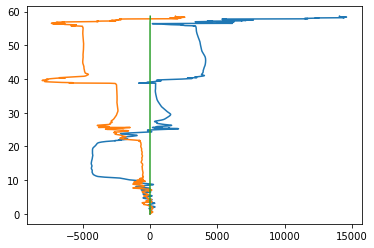

In [340]:
s = 1/30*np.arange(len(trajectory_x))
plt.plot(s,trajectory_x)

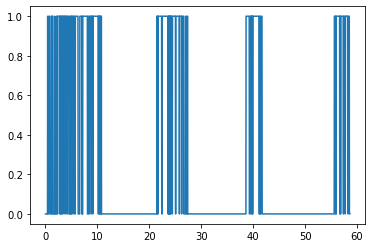

In [338]:
s = 1/30*np.arange(len(dif_x))
plt.plot(s,dif_x)
plt.show()

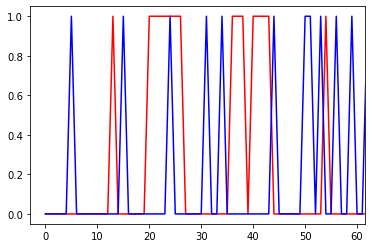

In [314]:
plt.plot(dif_x,'r', label='X axis')
plt.plot(dif_y,'b',label = 'Y axis' )
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.savefig('graph.pdf')


In [315]:
dif_x

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [316]:
print(len(container_x[0]))
print(container_x[0])

416
[1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418,

In [317]:
print(len(container_x[0]))

416


In [318]:
print(len(container_x[2]))

319


In [319]:
clip = VideoFileClip(path)
clip = [frame for frame in clip.iter_frames()]


In [320]:
def detect_blur(chunk, number_of_frames):
        lap_values = []
        compared_values = []

        for i, frame in enumerate(chunk):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            fm = cv2.Laplacian(gray, cv2.CV_64F).var()
            lap_values.append((fm, i))

        lap_values.sort(key=lambda x: x[0], reverse=True)
        print(lap_values)

        for i, val in enumerate(lap_values):
            if val[1] + number_of_frames - 1 <= len(chunk):
                ind1 = val[1]
                ind2 = val[1] + number_of_frames - 1
                return chunk[ind1:ind2]

        return chunk

In [321]:
detect_blur(chunk = clip, number_of_frames = 25)

078967, 1077), (196.83430589376314, 1655), (196.63374754829348, 1090), (196.55392204479105, 1098), (196.44519193291814, 1064), (196.27190340811146, 1055), (195.99326314205152, 206), (195.98850354349932, 1092), (195.9101406638024, 1086), (195.8758044265196, 944), (195.68382735877563, 1066), (195.5916465452927, 1276), (195.4819183947318, 75), (195.43519752517057, 118), (195.26045746303365, 222), (195.07186291788352, 1078), (195.0587571251321, 1061), (194.82014655572672, 1067), (194.70416476602554, 1072), (194.67892310489412, 1096), (194.6370784920445, 1275), (194.58144376320243, 1273), (194.51226939534763, 1063), (194.40425022455946, 1038), (194.36098473157136, 303), (194.31504384957256, 1056), (194.25936052797843, 1089), (194.14272954944664, 1079), (194.07686342268744, 1731), (194.0600080643243, 1068), (193.9129687083236, 1037), (193.7240967936364, 1034), (193.7029263014469, 942), (193.32880921366268, 1091), (193.23539376022907, 1274), (193.1782208364961, 1076), (193.14890027541907, 106

        [ 49,  56,  50]],
 
        [[ 45,  48,  30],
         [ 45,  48,  30],
         [ 48,  51,  33],
         ...,
         [ 49,  56,  50],
         [ 49,  56,  50],
         [ 49,  56,  50]],
 
        [[ 45,  48,  30],
         [ 45,  48,  30],
         [ 46,  49,  31],
         ...,
         [ 49,  56,  50],
         [ 49,  56,  50],
         [ 49,  56,  50]],
 
        ...,
 
        [[255, 253, 244],
         [255, 253, 244],
         [255, 250, 245],
         ...,
         [ 23,  23,  14],
         [ 21,  23,  14],
         [ 21,  23,  14]],
 
        [[255, 249, 235],
         [255, 249, 235],
         [255, 249, 240],
         ...,
         [ 23,  23,  14],
         [ 21,  23,  14],
         [ 21,  23,  14]],
 
        [[255, 246, 232],
         [255, 245, 231],
         [255, 246, 237],
         ...,
         [ 23,  23,  14],
         [ 21,  23,  14],
         [ 21,  23,  14]]], dtype=uint8),
 array([[[140, 132, 111],
         [133, 125, 104],
         [119, 111,  90],
 